In [1]:
from tqdm import tqdm
import os
from copy import deepcopy
import pickle
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.transforms import Compose
from datasets.ascad_datasets import AscadDataset, RandomShift, RandomNoise
from models.resnet_1d import resnet18
from training.single_model import train_step, eval_step
from training.common import execute_epoch
from display_results import plot_traces

In [2]:
epochs_per_trial = 500
device = 'cuda'
results_path = os.path.join('.', 'results', 'disc_hparam_sweep')
hparams_to_sweep = {
    'dataset_kwargs': [
        {'transform': None, 'mixup': False},
        {'transform': RandomShift(), 'mixup': False},
        {'transform': RandomNoise(), 'mixup': False},
        {'transform': None, 'mixup': True},
        {'transform': Compose((RandomShift(), RandomNoise())), 'mixup': False},
        {'transform': RandomShift(), 'mixup': True},
        {'transform': RandomNoise(), 'mixup': True},
        {'transform': Compose((RandomShift(), RandomNoise())), 'mixup': True}
    ]
}

#hparams_to_sweep = {
#    'learning_rate': [1e-3],#[1e-4, 5e-4, 1e-3, 5e-3, 1e-2],
#    'weight_decay': [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
#    'dropout': [0, 1e-3, 1e-2, 1e-1, 5e-1],
#    'batch_size': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}

In [3]:
class LossFn:
    def __init__(self):
        self.bce_loss = nn.BCELoss()
    def __call__(self, logits, target):
        prediction = nn.functional.softmax(logits, dim=-1)
        if target.shape != prediction.shape:
            target = nn.functional.one_hot(target, num_classes=256).to(torch.float)
        loss = self.bce_loss(prediction, target)
        return loss

In [4]:
test_dataset = AscadDataset(train=False)

Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [7:51:46<00:00, 56.55s/it]

Done. Min rank: 126.01142578125
	New best min rank. Previous best: inf


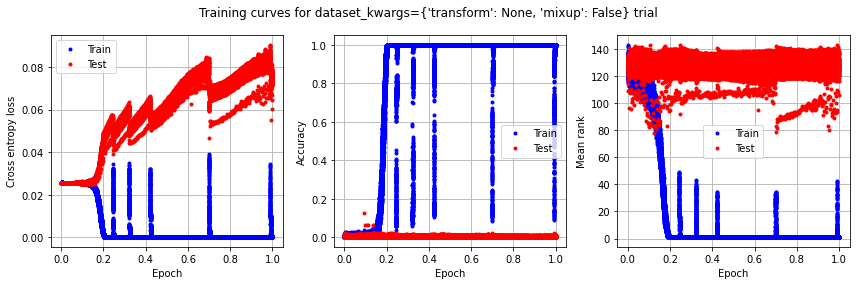







Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [7:51:49<00:00, 56.51s/it]

  8%|████████████▌                                                                                                                                                         | 38/501 [21:58<4:32:45, 35.35s/it]


 15%|█████████████████████████▌                                                                                                                                            | 77/501 [44:56<4:09:42, 35.34s/it]


 23%|█████████████████████████████████████▋                                                                                                                             | 116/501 [1:07:51<3:46:02, 35.23s/it]


 31%|██████████████████████████████████████████████████▍                                                                                                                | 155/501 [1:30:45<3:23:09, 35.23s/it]


 39%|███████████████████████████████████████████████████████████████                                                                                                    | 194/501 [1:53:38<2:59:57, 35.17s/it]


 47%|███████████████████████████████████████████████████████████████████████████▊                                                                                       | 233/501 [2:16:31<2:37:15, 35.21s/it]


 54%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 272/501 [2:39:23<2:14:22, 35.21s/it]


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 311/501 [3:02:15<1:51:27, 35.20s/it]


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 350/501 [3:25:06<1:28:26, 35.14s/it]


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 389/501 [3:47:58<1:05:39, 35.17s/it]


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 428/501 [4:10:51<42:49, 35.20s/it]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 467/501 [4:33:43<19:54, 35.12s/it]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [4:53:38<00:00, 35.14s/it]

Done. Min rank: 125.9044921875
	New best min rank. Previous best: 126.01142578125


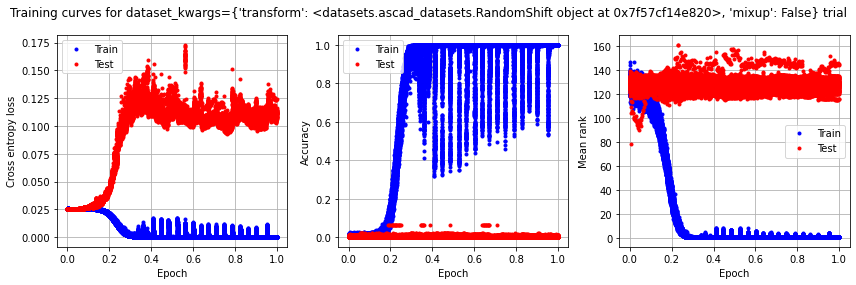







Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [8:02:51<00:00, 57.97s/it]

Done. Min rank: 126.25810546875


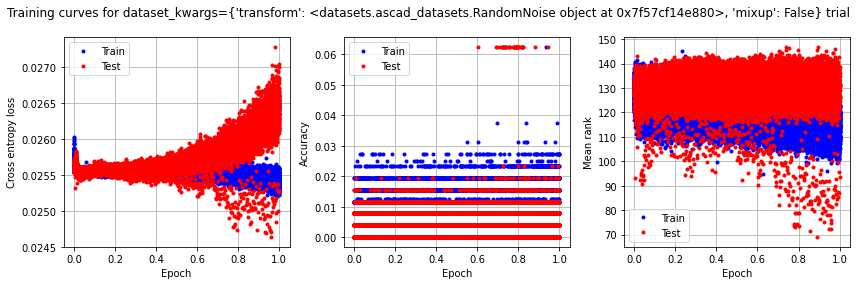







Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [8:02:54<00:00, 57.83s/it]

  8%|████████████▌                                                                                                                                                         | 38/501 [37:41<7:47:25, 60.57s/it]


 15%|█████████████████████████▏                                                                                                                                          | 77/501 [1:17:02<7:07:26, 60.49s/it]


 23%|█████████████████████████████████████▋                                                                                                                             | 116/501 [1:56:23<6:28:22, 60.52s/it]


 31%|██████████████████████████████████████████████████▍                                                                                                                | 155/501 [2:35:45<5:49:19, 60.58s/it]


 39%|███████████████████████████████████████████████████████████████                                                                                                    | 194/501 [3:15:05<5:09:04, 60.41s/it]


 47%|███████████████████████████████████████████████████████████████████████████▊                                                                                       | 233/501 [3:54:20<4:29:54, 60.43s/it]


 54%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 272/501 [4:33:38<3:50:49, 60.48s/it]


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 311/501 [5:12:56<3:11:27, 60.46s/it]


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 350/501 [5:52:16<2:32:13, 60.49s/it]


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 389/501 [6:31:31<1:52:49, 60.44s/it]


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 428/501 [7:10:39<1:12:55, 59.94s/it]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 467/501 [7:49:36<33:57, 59.92s/it]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [8:23:36<00:00, 59.97s/it]

Done. Min rank: 126.0390625


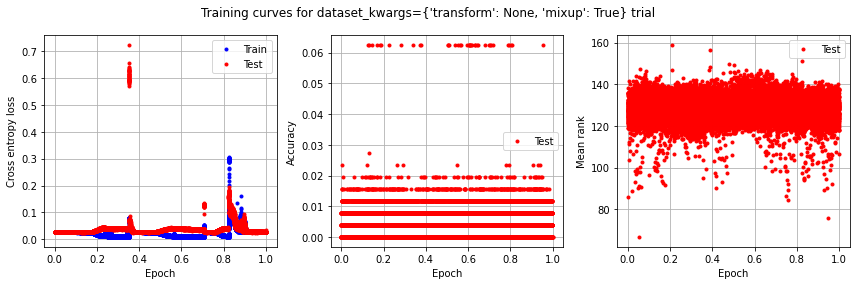







Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [5:03:09<00:00, 36.19s/it]

Done. Min rank: 126.61875


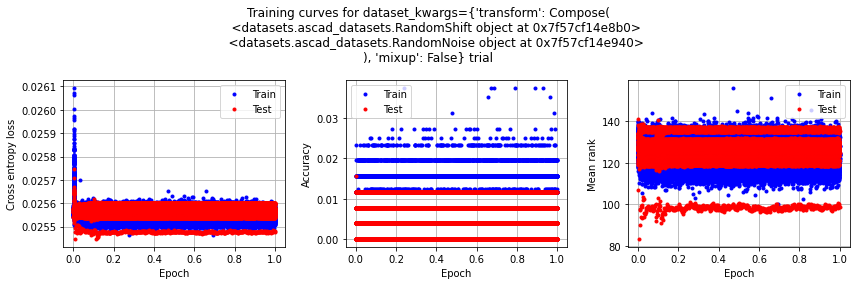







Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [5:03:13<00:00, 36.31s/it]

  8%|████████████▌                                                                                                                                                         | 38/501 [24:40<5:05:33, 39.60s/it]


 15%|█████████████████████████▌                                                                                                                                            | 77/501 [50:24<4:39:49, 39.60s/it]


 23%|█████████████████████████████████████▋                                                                                                                             | 116/501 [1:16:07<4:13:43, 39.54s/it]


 31%|██████████████████████████████████████████████████▍                                                                                                                | 155/501 [1:41:49<3:48:02, 39.54s/it]


 39%|███████████████████████████████████████████████████████████████                                                                                                    | 194/501 [2:07:32<3:22:19, 39.54s/it]


 47%|███████████████████████████████████████████████████████████████████████████▊                                                                                       | 233/501 [2:33:15<2:56:49, 39.59s/it]


 54%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 272/501 [2:58:57<2:31:00, 39.57s/it]


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 311/501 [3:24:38<2:05:03, 39.49s/it]


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 350/501 [3:50:19<1:39:24, 39.50s/it]


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 389/501 [4:15:59<1:13:43, 39.50s/it]


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 428/501 [4:41:40<48:06, 39.54s/it]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 467/501 [5:07:23<22:25, 39.57s/it]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [5:29:48<00:00, 39.52s/it]

Done. Min rank: 125.96650390625


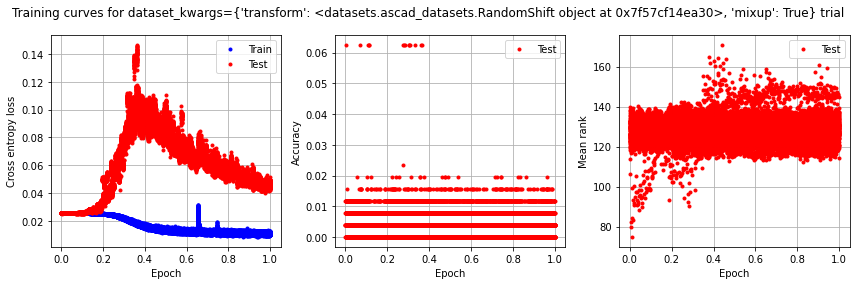







Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [8:43:41<00:00, 62.65s/it]

Done. Min rank: 126.52177734375


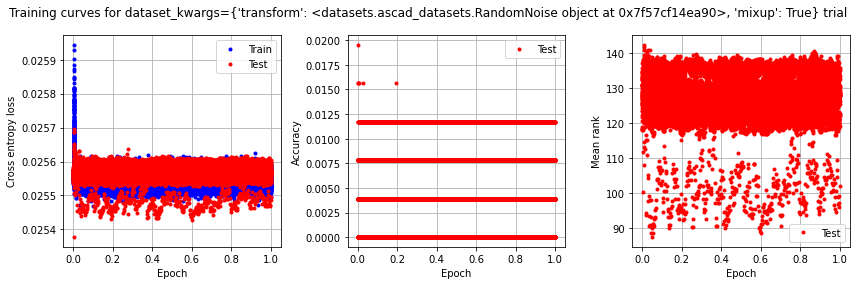







Starting new dataset_kwargs trial...
	Learning rate: 0.001
	Weight decay: 0
	Dropout: 0
	Batch size: 256



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [8:43:43<00:00, 62.72s/it]

  8%|████████████▌                                                                                                                                                         | 38/501 [26:43<5:30:29, 42.83s/it]


 15%|█████████████████████████▌                                                                                                                                            | 77/501 [54:32<5:02:11, 42.76s/it]


 23%|█████████████████████████████████████▋                                                                                                                             | 116/501 [1:22:22<4:34:33, 42.79s/it]


 31%|██████████████████████████████████████████████████▍                                                                                                                | 155/501 [1:50:10<4:06:21, 42.72s/it]


 39%|███████████████████████████████████████████████████████████████                                                                                                    | 194/501 [2:17:58<3:38:49, 42.77s/it]


 47%|███████████████████████████████████████████████████████████████████████████▊                                                                                       | 233/501 [2:45:46<3:11:10, 42.80s/it]


 54%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 272/501 [3:13:35<2:43:25, 42.82s/it]


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 311/501 [3:41:26<2:15:40, 42.85s/it]


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 350/501 [4:09:14<1:47:36, 42.76s/it]


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 389/501 [4:36:56<1:19:33, 42.62s/it]


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 428/501 [5:04:38<51:54, 42.66s/it]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 467/501 [5:32:19<24:07, 42.58s/it]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 501/501 [5:56:30<00:00, 42.57s/it]

Done. Min rank: 126.07060546875


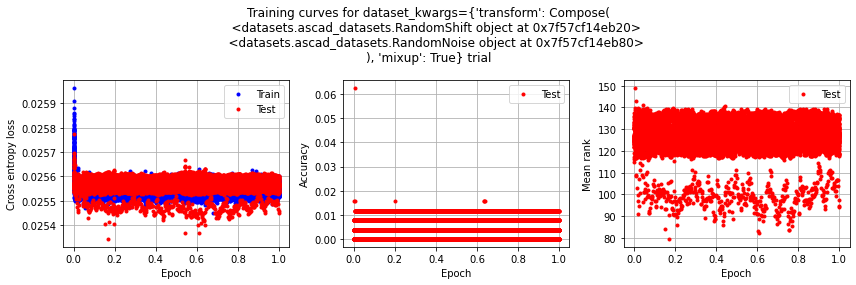

In [5]:
default_lr = 1e-3
default_weight_decay = 0
default_dropout = 0
default_batch_size = 256
default_dataset_kwargs = {'transform': None, 'mixup': False}

for hparam_name, values_to_try in hparams_to_sweep.items():
    best_min_rank = np.inf
    for value in values_to_try:
        min_rank = np.inf
        if hparam_name == 'learning_rate':
            learning_rate = value
        else:
            learning_rate = default_lr
        if hparam_name == 'weight_decay':
            weight_decay = value
        else:
            weight_decay = default_weight_decay
        if hparam_name == 'dropout':
            dropout = value
        else:
            dropout = default_dropout
        if hparam_name == 'batch_size':
            batch_size = value
        else:
            batch_size = default_batch_size
        if hparam_name == 'dataset_kwargs':
            dataset_kwargs = value
        else:
            dataset_kwargs = default_dataset_kwargs
        print('Starting new {} trial...'.format(hparam_name))
        print('\tLearning rate: {}'.format(learning_rate))
        print('\tWeight decay: {}'.format(weight_decay))
        print('\tDropout: {}'.format(dropout))
        print('\tBatch size: {}'.format(batch_size))
        train_dataset = AscadDataset(train=True, **dataset_kwargs)
        train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
        model = resnet18(dropout=dropout).to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        loss_fn = LossFn()
        
        def train_epoch(idx, train=True):
            if train:
                results = execute_epoch(train_step, train_dataloader,
                                        model, loss_fn, optimizer, device)
            else:
                results = execute_epoch(eval_step, train_dataloader,
                                        model, loss_fn, device)
            with open(os.path.join(results_path, 'hparam_{}_val_{}__train_epoch_{}.pickle'.format(hparam_name, value, idx)), 'wb') as F:
                pickle.dump(results, F)
        def eval_epoch(idx):
            global min_rank
            results = execute_epoch(eval_step, test_dataloader,
                                    model, loss_fn, device)
            rank = np.mean(results['mean_rank'])
            if rank < min_rank:
                min_rank = rank
            with open(os.path.join(results_path, 'hparam_{}_val_{}__eval_epoch_{}.pickle'.format(hparam_name, value, idx)), 'wb') as F:
                pickle.dump(results, F)
        
        progress_bar = tqdm(total=epochs_per_trial+1)
        train_epoch(0, train=False)
        eval_epoch(0)
        progress_bar.update(1)
        for epoch in range(1, epochs_per_trial+1):
            train_epoch(epoch)
            eval_epoch(epoch)
            progress_bar.update(1)
        print('Done. Min rank: {}'.format(min_rank))
        
        if min_rank < best_min_rank:
            print('\tNew best min rank. Previous best: {}'.format(best_min_rank))
            best_min_rank = min_rank
            if hparam_name == 'learning_rate':
                default_lr = value
            elif hparam_name == 'weight_decay':
                default_weight_decay = value
            elif hparam_name == 'dropout':
                default_dropout = value
            elif hparam_name == 'batch_size':
                default_batch_size = value
            elif hparam_name == 'dataset_kwargs':
                default_dataset_kwargs = value
        
        fig, axes = plot_traces(results_path, 'hparam_{}_val_{}'.format(hparam_name, value), ['loss', 'acc', 'mean_rank'])
        axes[0].set_ylabel('Cross entropy loss')
        axes[1].set_ylabel('Accuracy')
        axes[2].set_ylabel('Mean rank')
        fig.suptitle('Training curves for {}={} trial'.format(hparam_name, value))
        plt.tight_layout()
        plt.show()
        print('\n\n\n\n\n')